## Data Cleaning

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv('../data/clean_data.csv')
df.shape

(80, 8)

In [61]:
df.isna().sum()

Decision          1
State             0
GPA               1
WorkExp           0
TestScore         1
WritingScore      0
Gender            2
VolunteerLevel    0
dtype: int64

In [62]:
df = df[df['Decision'].notna()]
df.head(10)

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,Admit,California,3.90,6.7,962.0,100,1.0,0
1,Admit,Florida,3.80,1.4,969.0,97,1.0,4
2,Banana,California,3.80,2.3,970.0,98,0.0,5
3,Admit,Colorado,3.60,0.9,969.0,97,0.0,2
4,Admit,Colorado,3.92,1.2,969.0,95,-1.0,3
6,Admit,California,3.88,1.5,967.0,95,1.0,5
7,Admit,California,3.70,1.2,969.0,94,1.0,2
8,Admit,Florida,3.90,4.7,961.0,93,1.0,1
9,Admit,California,3.70,1.4,966.0,94,1.0,0
10,Admit,Florida,3.80,1.7,968.0,91,NaN,3


In [63]:
df.isna().sum()

Decision          0
State             0
GPA               1
WorkExp           0
TestScore         0
WritingScore      0
Gender            2
VolunteerLevel    0
dtype: int64

In [64]:
df = df.dropna()

In [66]:
# remove nonsensical answers in Decision and Gender columns
df['Decision'].unique()
df = df[df['Decision'] != 'Banana']
print(df.shape)
df = df.drop(df[df["Gender"] < 0].index)
df = df.drop(df[df["WorkExp"] > 50].index)
df = df.drop(df[df["GPA"] > 5].index)
df.head()

(83, 8)


,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,Admit,California,3.90,6.7,962.0,100,1.0,0
1,Admit,Florida,3.80,1.4,969.0,97,1.0,4
3,Admit,Colorado,3.60,0.9,969.0,97,0.0,2
6,Admit,California,3.88,1.5,967.0,95,1.0,5
7,Admit,California,3.70,1.2,969.0,94,1.0,2


In [67]:
# capitalize all states
df.State = df.State.str.title()
df['State'] = df['State'].replace('New york', 'New York')

In [68]:
# Save to csv
df.to_csv("../data/clean_data.csv", index=False)

## Visualizations

In [30]:
# Hide output with -q
!pip install -q altair

In [61]:
decision_count = df.groupby(['Decision', 'State']).size().reset_index()
decision_count = decision_count.rename(columns={0: 'Count'})
decision_count

,Decision,State,Count
0,Admit,California,9
1,Admit,Colorado,8
2,Admit,Florida,11
3,Admit,Utah,1
4,Decline,California,1
5,Decline,Colorado,6
6,Decline,Florida,13
7,Decline,Mississippi,1
8,Decline,Oregon,1
9,Decline,Utah,2


In [62]:
import altair as alt

unique_states = decision_count['State'].unique().tolist()

# Dropdown selection
input_dropdown = alt.binding_select(options=[None] + unique_states, labels = ['All'] + unique_states, name='State')
selection = alt.selection_single(fields=['State'], bind=input_dropdown)

decision_bar = alt.Chart(decision_count).transform_filter(
    selection
).mark_bar().encode(
    alt.X('Decision:O', title='Decision'),
    alt.Y('Count:Q', title='Count'),
).add_selection(selection).interactive()
chart_title = "Bar Chart of Decision Results Counts for States"
decision_bar = decision_bar.properties(title=chart_title)

decision_bar

c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning:

'selection_single' is deprecated.  Use 'selection_point'

c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning:

'add_selection' is deprecated. Use 'add_params' instead.



alt.Chart(...)

In [63]:
import altair as alt

unique_states = decision_count['State'].unique().tolist()

# # Dropdown selection
# input_dropdown = alt.binding_select(options=[None] + unique_states, labels = ['All'] + unique_states, name='State')
# selection = alt.selection_single(fields=['State'], bind=input_dropdown)

decision_bar = alt.Chart(decision_count).mark_bar().encode(
    x=alt.X('Decision:O', title='Decision', axis=alt.Axis(labelAngle=0), sort='-y'),
    y=alt.Y('Count:Q', title='Count'),
    xOffset='State',
    color=alt.Color('State:N', sort=alt.EncodingSortField(field='Count', op='sum', order='descending'))#, scale=alt.Scale(scheme='inferno'))
)
chart_title = "Bar Chart of Decision Results Counts for States"
decision_bar = decision_bar.properties(title=chart_title)

decision_bar

alt.Chart(...)

array([[<Axes: title={'center': 'Admit'}>,
        <Axes: title={'center': 'Decline'}>],
       [<Axes: title={'center': 'Waitlist'}>, <Axes: >]], dtype=object)

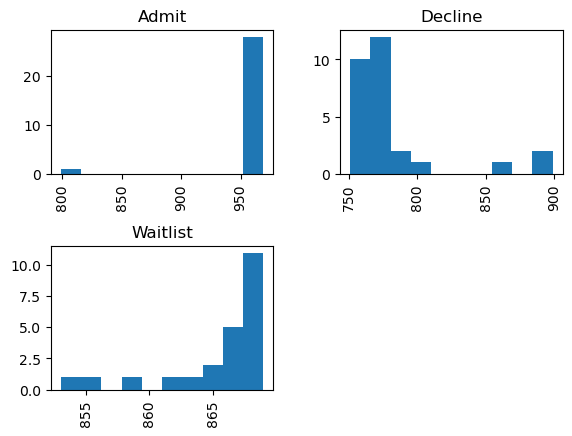

In [64]:
df.hist('TestScore', by='Decision')

[Text(0.5, 1.0, 'Histogram of Test Scores by Decision')]

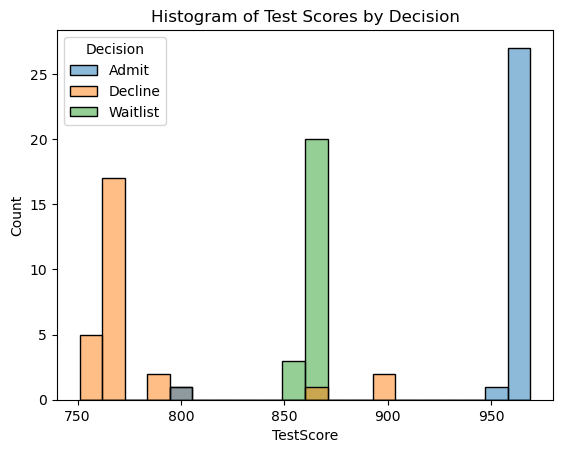

In [65]:
sns.histplot(x="TestScore", hue="Decision", data=df, bins=20).set(title='Histogram of Test Scores by Decision')

In [66]:
# Dropdown selection
input_dropdown = alt.binding_select(options=[None] + unique_states, labels = ['All'] + unique_states, name='State')
selection = alt.selection_single(fields=['State'], bind=input_dropdown)

gpa_bar = alt.Chart(df).transform_filter(
    selection
).mark_bar(
    opacity=0.5,
    binSpacing=0
).encode(
    alt.X('GPA:Q'),
    alt.Y('count()', title='Count of Occurrences'),
    alt.Color('Decision:N')
).add_selection(selection).interactive()
chart_title = "Histogram of GPA by Decision Result for States"
gpa_bar = gpa_bar.properties(title=chart_title)

gpa_bar

c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning:

'selection_single' is deprecated.  Use 'selection_point'

c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning:

'add_selection' is deprecated. Use 'add_params' instead.



alt.Chart(...)

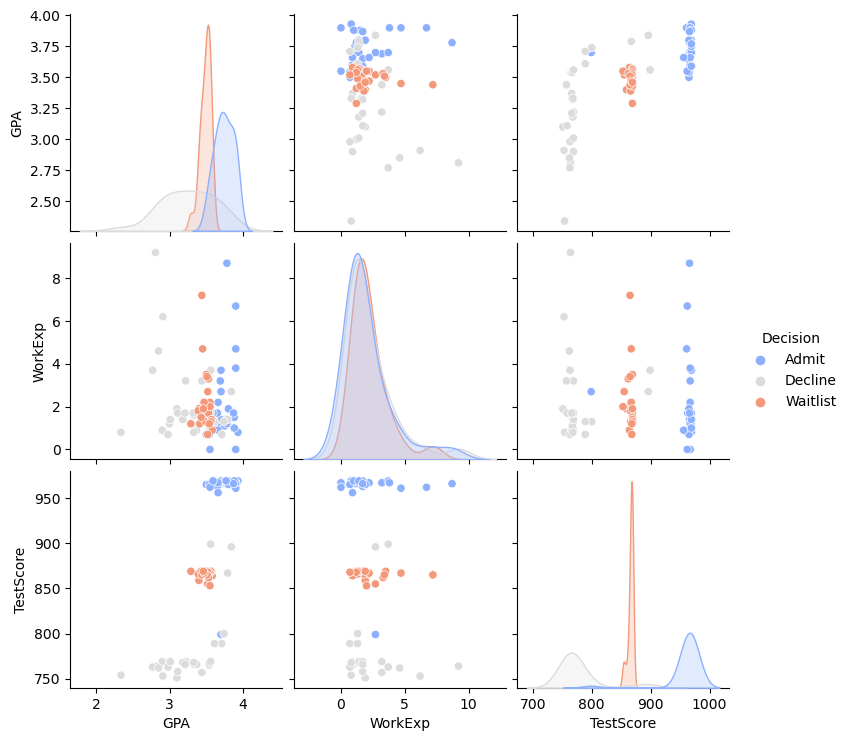

In [135]:
scatter_cols = df[['State', 'Decision', 'GPA', 'WorkExp', 'TestScore']]
sns.pairplot(scatter_cols, hue='Decision', palette='coolwarm')
#sns.color_palette('YlGnBu')

## Maps

In [68]:
#calculate averages of all numeric columns
num_cols = df[['State', 'GPA', 'WorkExp', 'TestScore', 'WritingScore', 'VolunteerLevel']]
avg_df = num_cols.groupby('State').mean().reset_index()
state_abbr = {
    'Alabama': 'AL',
    'California': 'CA',
    'Colorado': 'CO',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Mississippi': 'MS',
    'New York': 'NY',
    'Oregon': 'OR',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA'

}
avg_df['State_Abbr'] = avg_df['State'].map(state_abbr)
avg_df = avg_df.drop(columns=['State'])
avg_df = avg_df.rename(columns={'State_Abbr': 'State'})
avg_df

,GPA,WorkExp,TestScore,WritingScore,VolunteerLevel,State
0,3.410000,1.200000,868.000000,85.000000,0.000000,AL
1,3.600833,2.808333,916.166667,90.833333,2.666667,CA
2,3.467222,1.844444,877.055556,80.000000,2.444444,CO
3,3.559143,2.117143,872.571429,80.428571,2.457143,FL
4,2.910000,6.200000,753.000000,77.000000,1.000000,MS
5,3.550000,2.200000,866.000000,74.000000,1.000000,NY
6,2.900000,0.900000,769.000000,87.000000,4.000000,OR
7,3.443333,1.250000,850.666667,78.333333,2.500000,UT
8,3.530000,3.300000,862.000000,85.000000,1.000000,VT
9,3.142500,2.375000,766.000000,76.500000,3.250000,VA


In [120]:
import plotly.express as px

fig = px.choropleth(avg_df, locationmode="USA-states", 
                    locations=avg_df['State'], 
                    scope="usa",
                    color=avg_df['GPA'],
                    hover_data={"State": True, "GPA": True},  
                    labels={"GPA": "Selected Variable"},
                    color_continuous_scale='deep'
                )

dropdown = []
for col in avg_df.columns[:-1]:
    dropdown.append({'label': col, 'method': 'update', 'args': [{'z': [avg_df[col]]}]})

fig.update_layout(updatemenus=[{'buttons': dropdown, 'direction': 'down', 'showactive': True}],
                  title='Choropleth Map of Average Selected Variable')
fig.update_coloraxes(colorbar_title=dict(text='Selected Variable'))

fig.show()

In [71]:
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import interact, fixed

df_melted = pd.melt(avg_df[1:], id_vars=['State'], var_name='Variable', value_name='Value')

def update_map(df, variable):
    if variable is None:
        return 
    filtered_df = df[df['Variable'] == variable]

    fig = go.Figure(go.Choropleth(
        locationmode="USA-states",
        locations=df['State'],
        z = filtered_df['Value'],  
        colorscale='Viridis',
        colorbar=dict(title=variable)
    ))

    fig.update_geos(scope="usa")

    fig.show()

variables = np.insert(df_melted['Variable'].unique(), 0, None)

interact(update_map, df=fixed(df_melted), variable=variables)

interactive(children=(Dropdown(description='variable', options=(None, 'GPA', 'WorkExp', 'TestScore', 'WritingS…

<function __main__.update_map(df, variable)>

In [173]:
from vega_datasets import data

df_melted = pd.melt(avg_df, id_vars=['State'], var_name='Variable', value_name='Value')
print(df_melted)

states = alt.topo_feature(data.us_10m.url, feature='states')
states = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project('albersUsa').properties(
    width=500,
    height=300
)

dropdown = alt.binding_select(options=list(avg_df.columns[:-1]))
selection = alt.selection_single(fields=['Variable'], bind=dropdown, name='Select')

choropleth = alt.Chart(df_melted).mark_geoshape().encode(
    color=alt.condition(
        selection,
        alt.Color('Value:Q', scale=alt.Scale(scheme='blueorange')),
        alt.value('lightgray')
    ),
    tooltip=['State:N', 'Value:Q']
).project('albersUsa').properties(
    width=500,
    height=300
).add_selection(
    selection
)

states + choropleth


   State        Variable       Value
0     AL             GPA    3.410000
1     CA             GPA    3.600833
2     CO             GPA    3.616500
3     FL             GPA    3.559143
4     GA             GPA    3.560000
5     MS             GPA    2.910000
6     NY             GPA    3.550000
7     OR             GPA    2.900000
8     UT             GPA    3.443333
9     VT             GPA    3.530000
10    VA             GPA    3.142500
11    AL         WorkExp    1.200000
12    CA         WorkExp    2.808333
13    CO         WorkExp    1.760000
14    FL         WorkExp    2.117143
15    GA         WorkExp  100.000000
16    MS         WorkExp    6.200000
17    NY         WorkExp    2.200000
18    OR         WorkExp    0.900000
19    UT         WorkExp    1.250000
20    VT         WorkExp    3.300000
21    VA         WorkExp    2.375000
22    AL       TestScore  868.000000
23    CA       TestScore  916.166667
24    CO       TestScore  886.250000
25    FL       TestScore  872.571429
2

c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning:

'selection_single' is deprecated.  Use 'selection_point'

c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning:

'add_selection' is deprecated. Use 'add_params' instead.



alt.LayerChart(...)

In [101]:
from vega_datasets import data

state_id_dict = dict(zip(data.population_engineers_hurricanes()["state"], data.population_engineers_hurricanes()["id"]))
df["StateID"] = df["State"].map(state_id_dict)

admit = df[df['Decision'] == 'Admit'].groupby('State').mean().reset_index()
decline = df[df['Decision'] == 'Decline'].groupby('State').mean().reset_index()
waitlist = df[df['Decision'] == 'Waitlist'].groupby('State').mean().reset_index()

states = alt.topo_feature(data.us_10m.url, 'states')
existing_states = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project('albersUsa').properties(
    width=500,
    height=300
)

print(admit.columns)
variable_list = ['GPA', 'WorkExp', 'TestScore', 'WritingScore']

admit_map = alt.Chart(states).mark_geoshape().encode(
    color='GPA:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(admit, 'id', list(admit.columns))
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

existing_states + admit_map

Index(['State', 'GPA', 'WorkExp', 'TestScore', 'WritingScore', 'Gender',
       'VolunteerLevel', 'StateID'],
      dtype='object')


C:\Users\theda\AppData\Local\Temp\ipykernel_4008\1783692774.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\theda\AppData\Local\Temp\ipykernel_4008\1783692774.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\theda\AppData\Local\Temp\ipykernel_4008\1783692774.py:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



alt.LayerChart(...)

In [96]:
from vega_datasets import data

state_id_dict = dict(zip(data.population_engineers_hurricanes()["state"], data.population_engineers_hurricanes()["id"]))
df["StateID"] = df["State"].map(state_id_dict)

admit = df[df['Decision'] == 'Admit'].groupby('State').mean().reset_index()
decline = df[df['Decision'] == 'Decline'].groupby('State').mean().reset_index()
waitlist = df[df['Decision'] == 'Waitlist'].groupby('State').mean().reset_index()

# admit['State_Abbr'] = admit['State'].map(state_abbr)
# decline['State_Abbr'] = decline['State'].map(state_abbr)
# waitlist['State_Abbr'] = waitlist['State'].map(state_abbr)

# admit = admit.drop(columns=['State'])
# decline = decline.drop(columns=['State'])
# waitlist = waitlist.drop(columns=['State'])

# admit = admit.rename(columns={'State_Abbr': 'State'})
# decline = avg_df.rename(columns={'State_Abbr': 'State'})
# waitlist = avg_df.rename(columns={'State_Abbr': 'State'})

states = alt.topo_feature(data.us_10m.url, feature='states')
existing_states = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project('albersUsa').properties(
    width=500,
    height=300
)

click = alt.selection_multi(fields = ["State"])

# missing_states = (
#     alt.Chart(states)
#     .mark_geoshape(fill = "lightgrey", stroke = "white")
#     .encode(opacity=alt.condition("isValid(datum.AdmitRate)", alt.value(0), alt.value(0.2))).add_selection(click).project(type = "albersUsa"))

# full_map = existing_states + missing_states


admit_map = alt.Chart(existing_states).mark_geoshape().encode(
    color = "GPA:Q",
    tooltip = ["State:N", "GPA:Q"]
).transform_lookup(
    lookup = "id",
    from_ = alt.LookupData(admit, "StateID", list(admit.columns))
).properties(width = 500, height = 300).add_selection(click).project(type = "albersUsa")

# dropdown = alt.binding_select(options=list(avg_df.columns[:-1]))
# selection = alt.selection_single(fields=['Variable'], bind=dropdown, name='Select')

# admit_map = alt.Chart(admit).mark_geoshape().encode(
#     color='GPA:Q',
#     tooltip=['State:N', 'GPA:Q']
# ).project('albersUsa').properties(
#     width=500,
#     height=300
# ).add_selection(
#     selection
# )

admit_map

C:\Users\theda\AppData\Local\Temp\ipykernel_4008\743730222.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\theda\AppData\Local\Temp\ipykernel_4008\743730222.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\theda\AppData\Local\Temp\ipykernel_4008\743730222.py:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDepreca

SchemaValidationError: `Data` has no parameter named 'data'

Existing parameter names are:
args   

See the help for `Data` to read the full description of these parameters

alt.Chart(...)

In [84]:
import altair as alt
from vega_datasets import data
import pandas as pd

# Assuming admit, decline, and waitlist are your dataframes
admit = df[df['Decision'] == 'Admit'].groupby('State').mean().reset_index()
decline = df[df['Decision'] == 'Decline'].groupby('State').mean().reset_index()
waitlist = df[df['Decision'] == 'Waitlist'].groupby('State').mean().reset_index()

admit['State_Abbr'] = admit['State'].map(state_abbr)
decline['State_Abbr'] = decline['State'].map(state_abbr)
waitlist['State_Abbr'] = waitlist['State'].map(state_abbr)

admit = admit.drop(columns=['State'])
decline = decline.drop(columns=['State'])
waitlist = waitlist.drop(columns=['State'])

admit = admit.rename(columns={'State_Abbr': 'State'})
decline = avg_df.rename(columns={'State_Abbr': 'State'})
waitlist = avg_df.rename(columns={'State_Abbr': 'State'})

# Define base maps for admit, decline, and waitlist
def create_choropleth(df, title):
    states = alt.topo_feature(data.us_10m.url, feature='states')
    return alt.Chart(states).mark_geoshape(
        fill='lightgray',
        stroke='white'
    ).project('albersUsa').properties(
        title=title,
        width=300,
        height=200
    ).encode(
        color=alt.Color('GPA:Q', scale=alt.Scale(scheme='viridis')),
        tooltip=['State:N', 'GPA:Q']
    ).transform_filter(
        alt.FieldOneOfPredicate(field='State', oneOf=list(df['State']))
    )

admit_map = create_choropleth(admit, 'Admit')
decline_map = create_choropleth(decline, 'Decline')
waitlist_map = create_choropleth(waitlist, 'Waitlist')

# Combine the maps horizontally
combined_maps = admit_map | decline_map | waitlist_map
combined_maps


C:\Users\theda\AppData\Local\Temp\ipykernel_4008\3921671048.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\theda\AppData\Local\Temp\ipykernel_4008\3921671048.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\theda\AppData\Local\Temp\ipykernel_4008\3921671048.py:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



alt.HConcatChart(...)